<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Informe%2010%20Topological%20Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Descripción del Problema**

El problema a solucionar consiste en encontrar una lista de nodos los cuales cumplan con la propiedad de que cada nodo se encuentre antes que sus descendientes en el grafo.

Para solucionar el problema, se presenta el algoritmo de **Orden Topológico** el cual posee la siguiente entrada y salida:

**Entrada**: Grafo dirigido sin ciclos $G=(V,E)$.

**Salida:** Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.

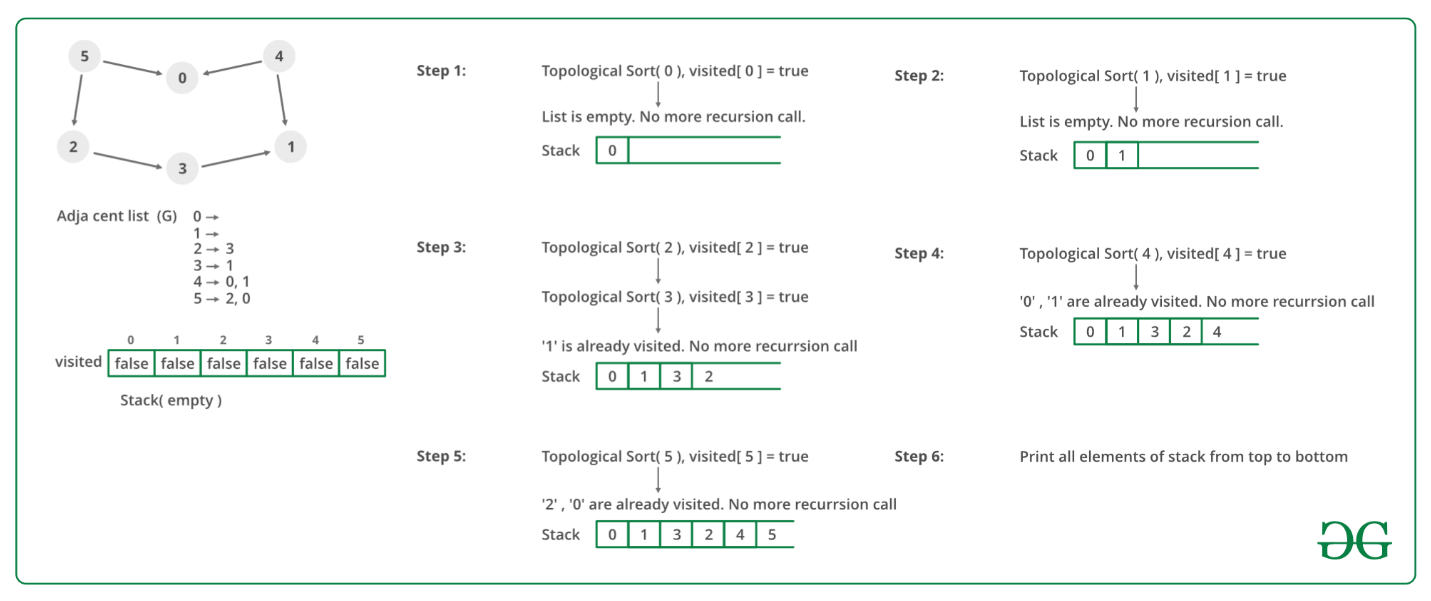

# **2. Descripción del Algoritmo**

El algoritmo de orden topológico realiza búsquedas en profundidad, utilizando el método de **DFS** comenzando desde un nodo no explorado donde se realiza un recorrido **post-orden** etiquetando cada nodo visitado según un contador decreciente inicializado con la cantidad **n** de nodos del grafo. 

Para que funcione correctamente el algoritmo se debe tener un grafo dirigido sin ciclos(DAG).

**Pasos**:

1.   Se crea un stack que almacena el orden de los nodos
2.   Se llama a DFS de forma recursiva por cada nodo no descubierto, esto para cada nodo **adyacente** no visitado
3.   Una vez se acaba el recorrido posible, se guarda el nodo en el stack
4. Se repite el paso 2 y 3 hasta que todos los nodos hayan sido recorridos
5. Se retorna el stack que representa el **orden topológico** buscado



### **2.1 Ejemplo**

### 1. Grafo inicial

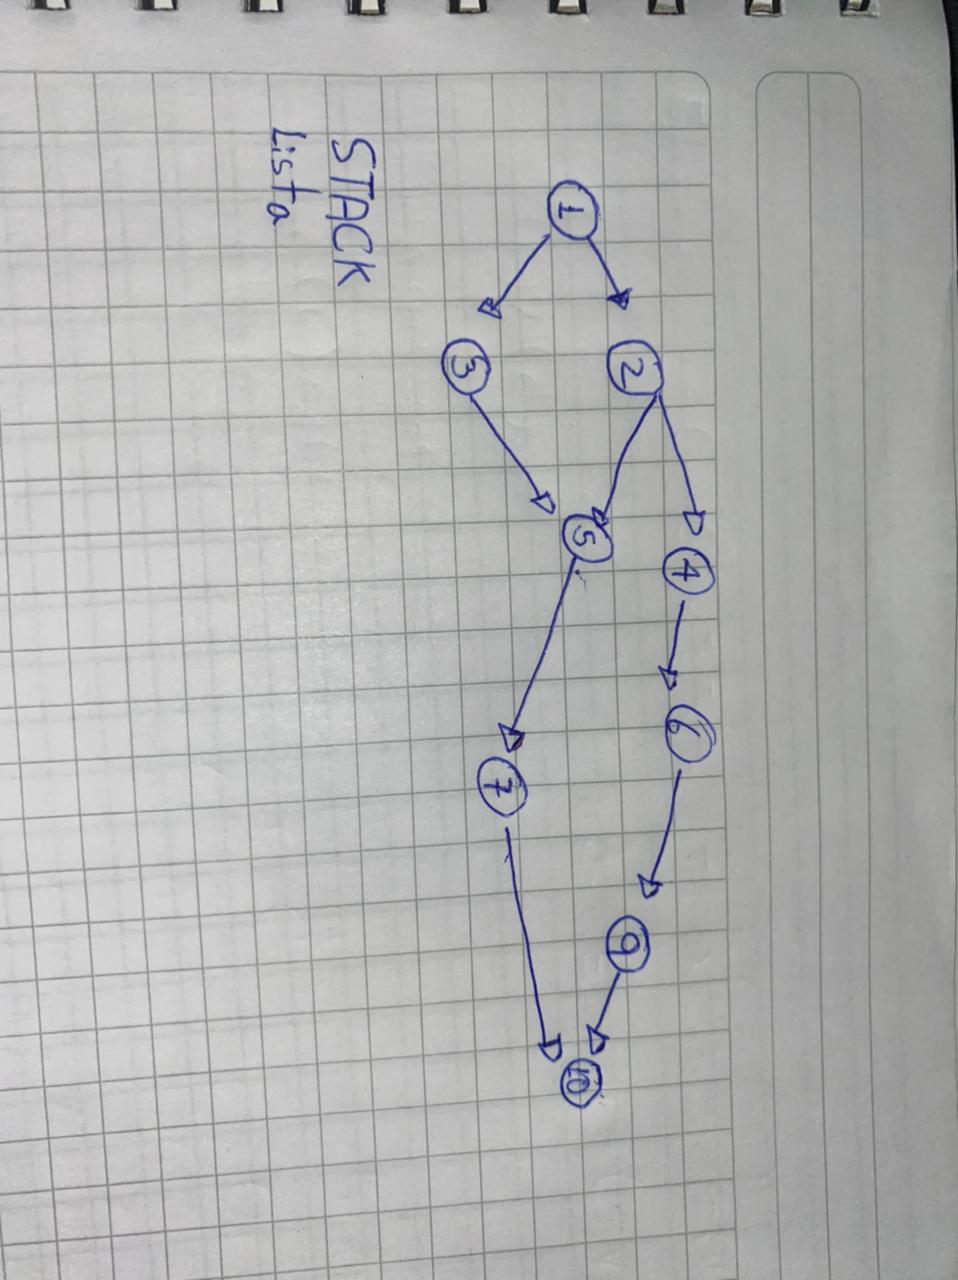

### 2. Se escoge nodo no visitado $1$

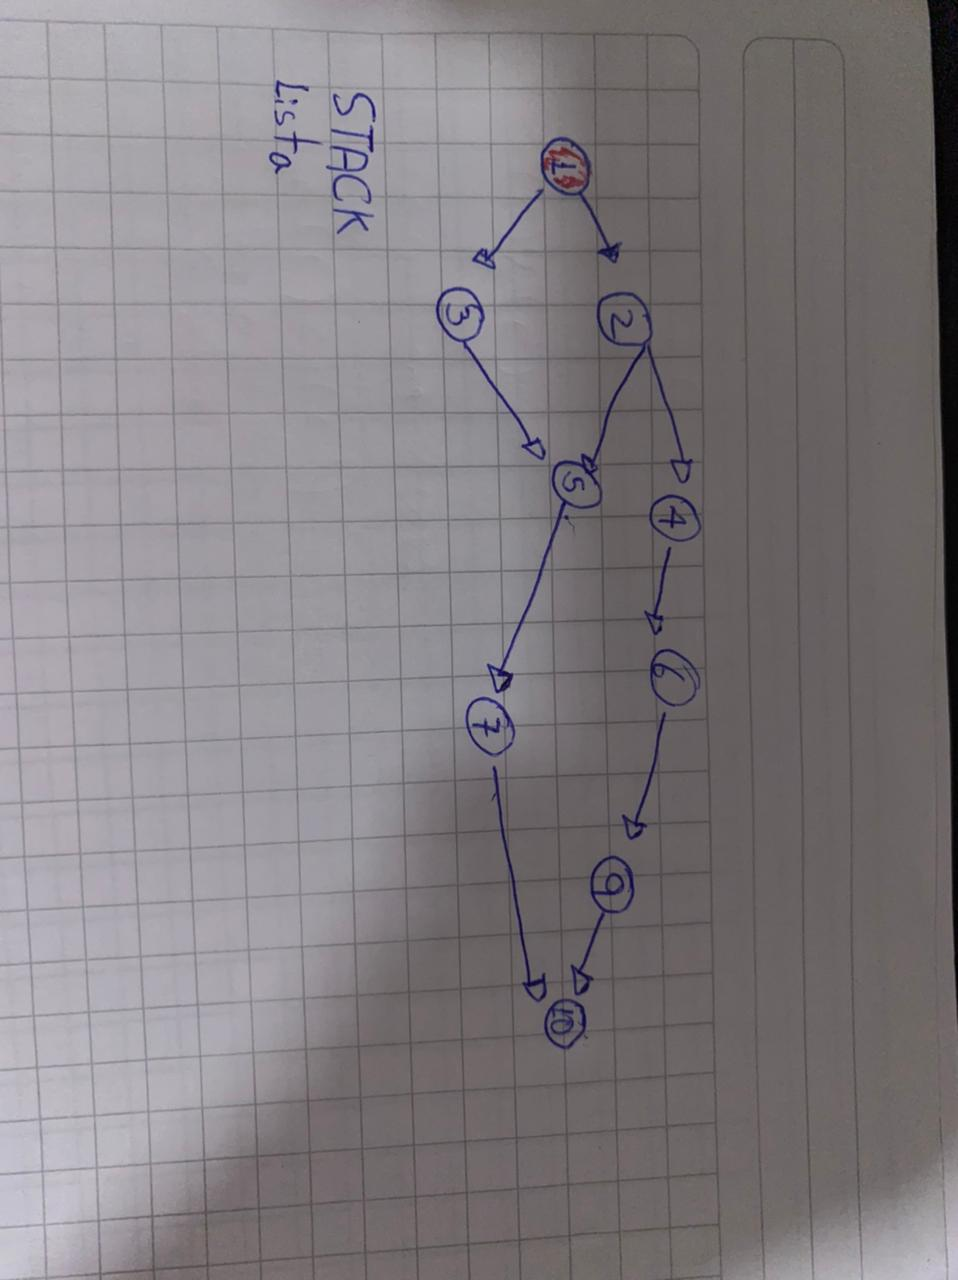

### **Stack = $[1]$**

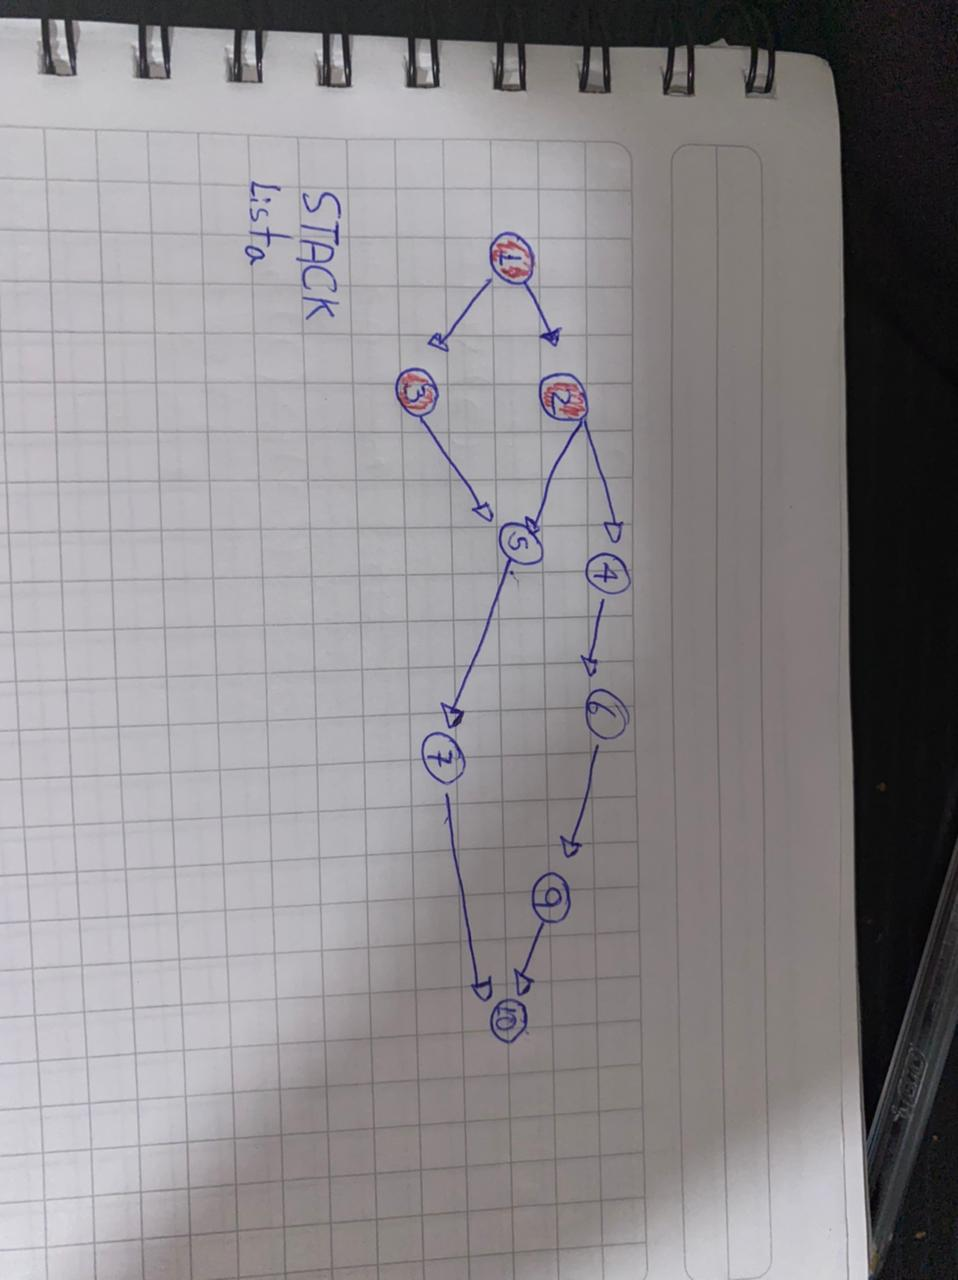

### **Stack = $[1,3,2]$**

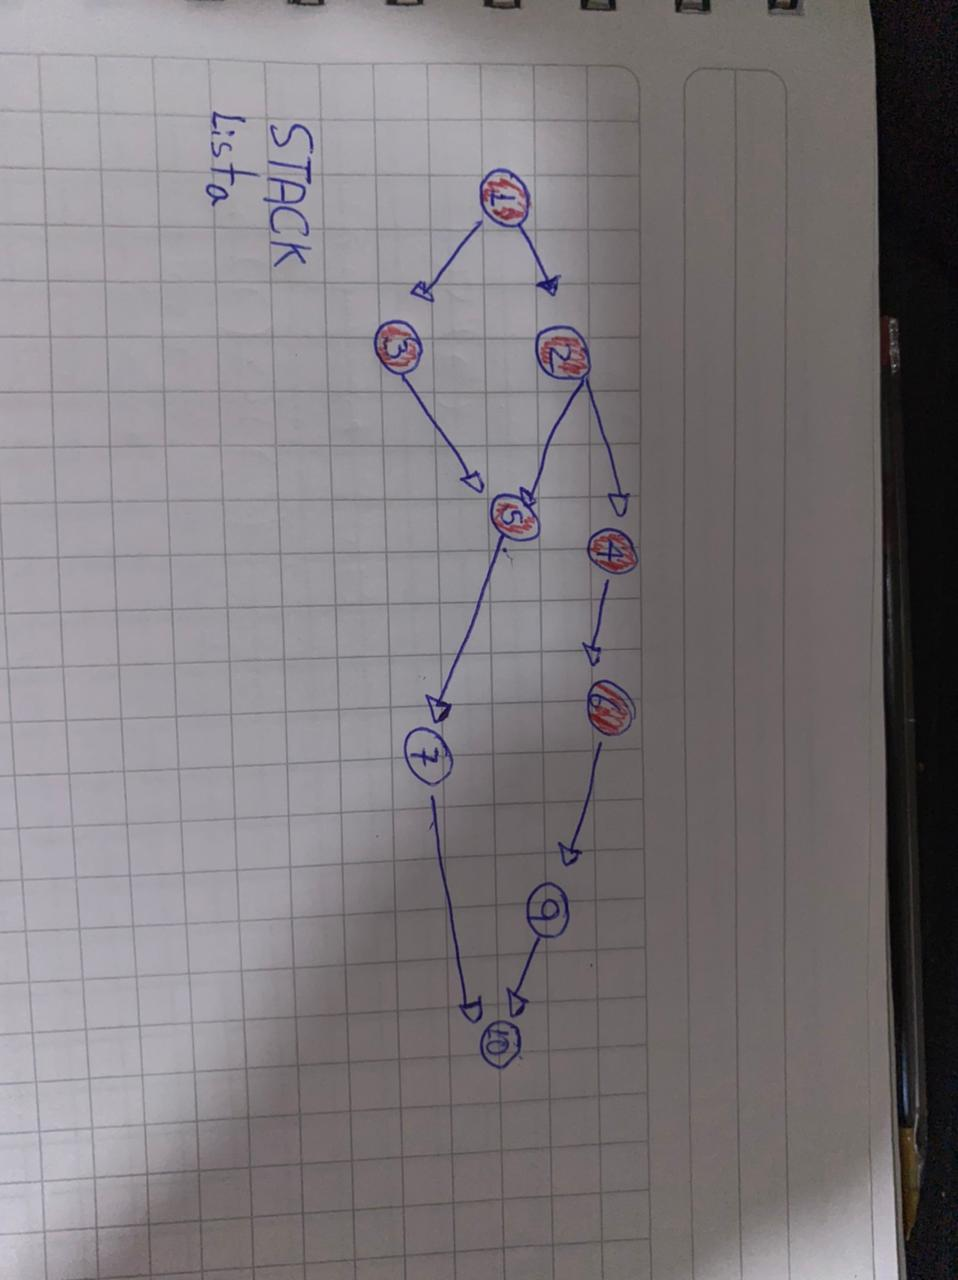

### **Stack = $[1,3,2,5,4,6]$**

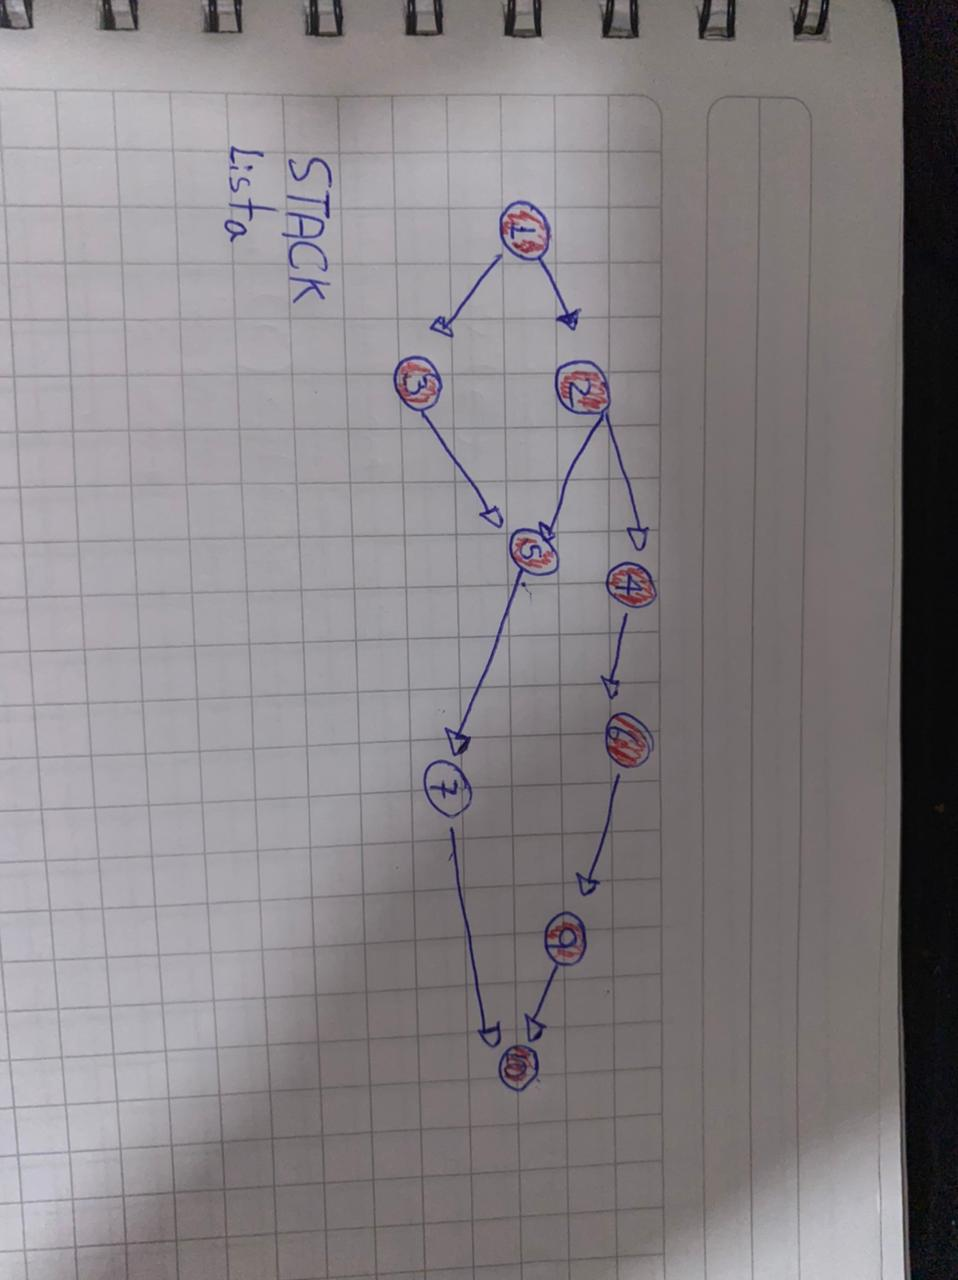

### **Stack = $[1,3,2,5,4,6,9,10]$**

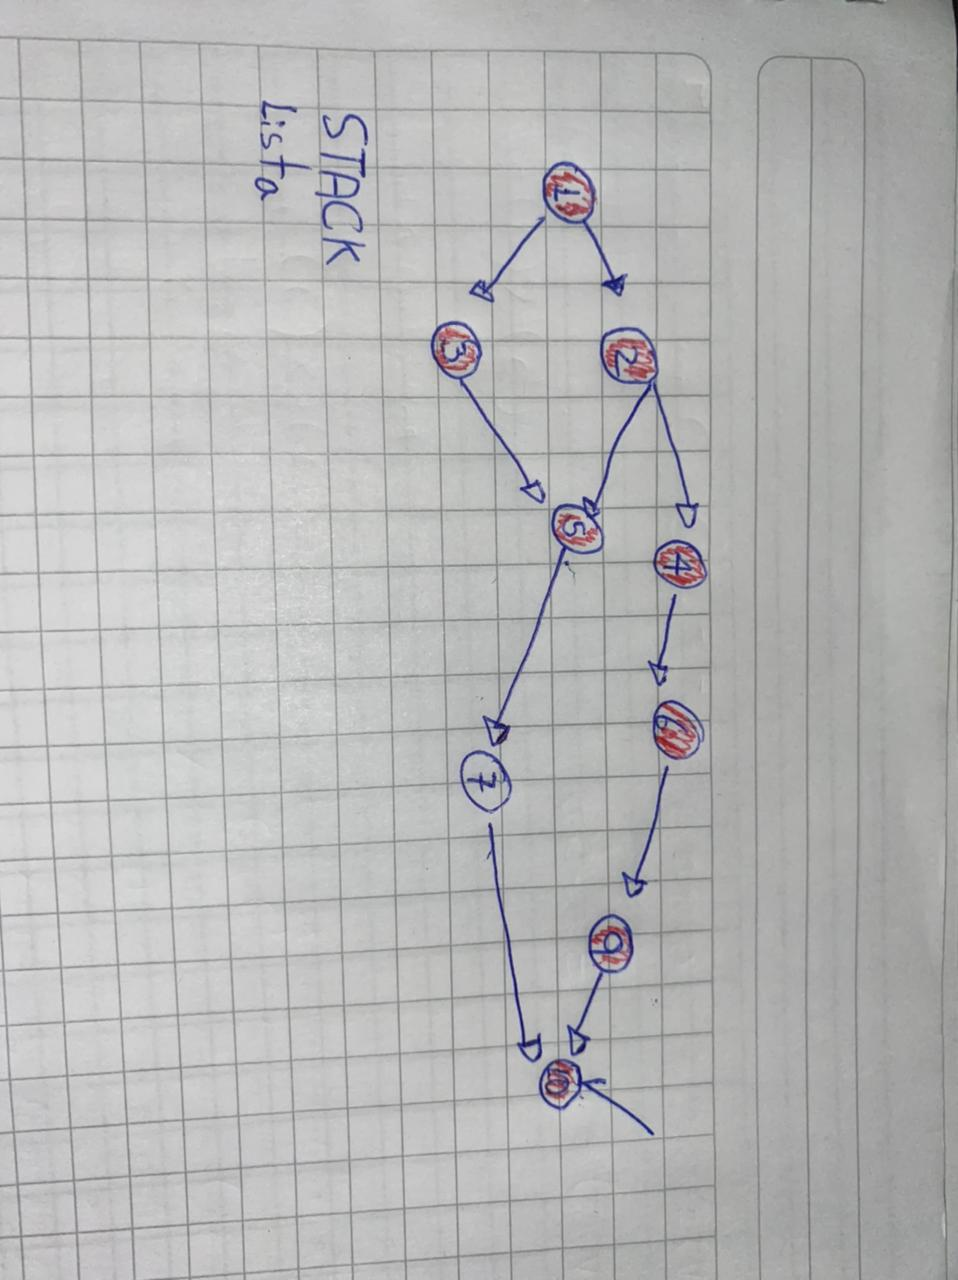

### **Stack = $[1,3,2,5,4,6,9,10]$**
### **Lista = $[10]$**

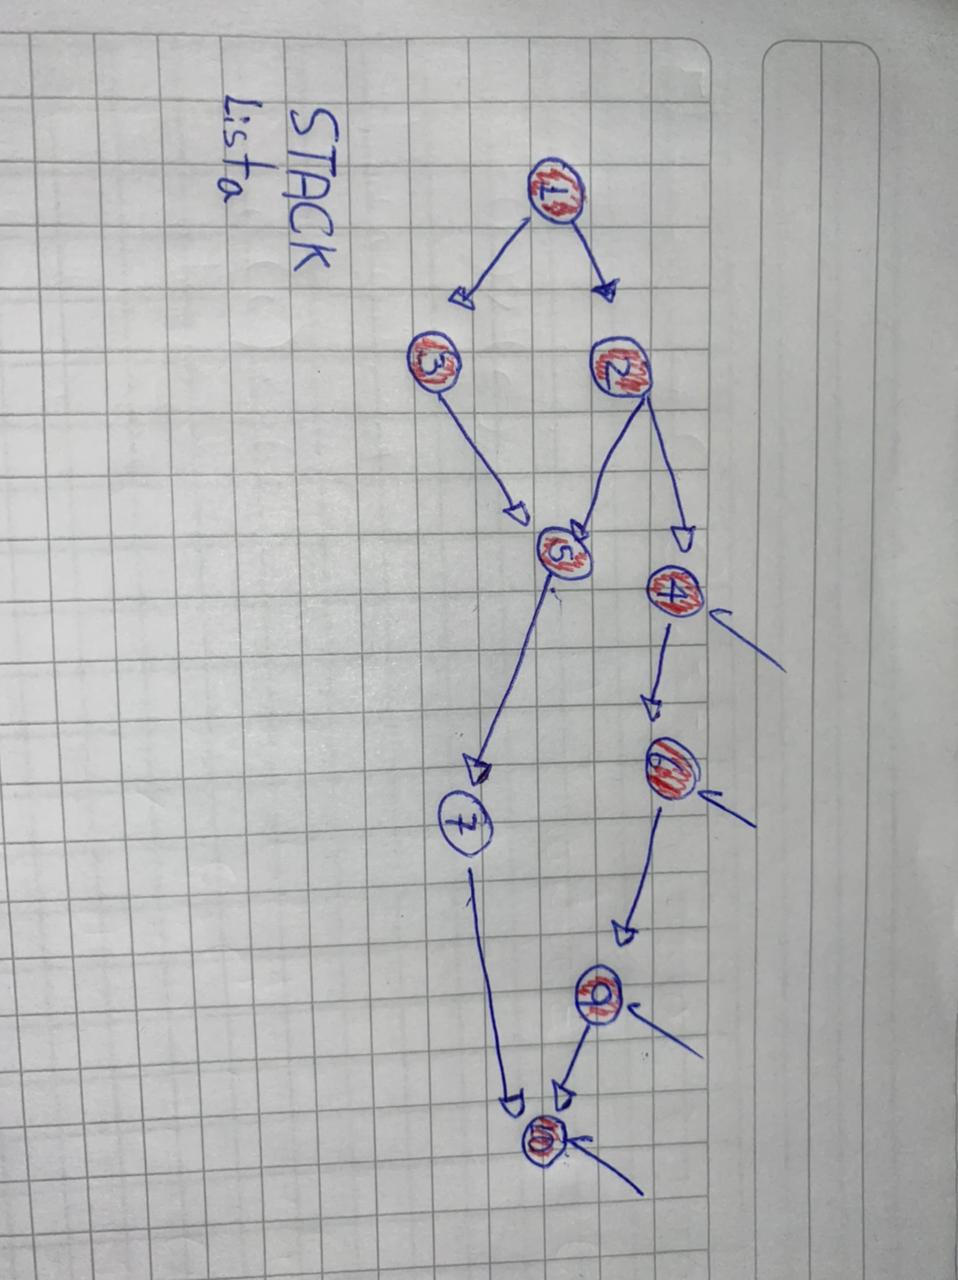

### **Stack = $[1,3,2,5]$**
### **Lista = $[4,6,9,10]$**

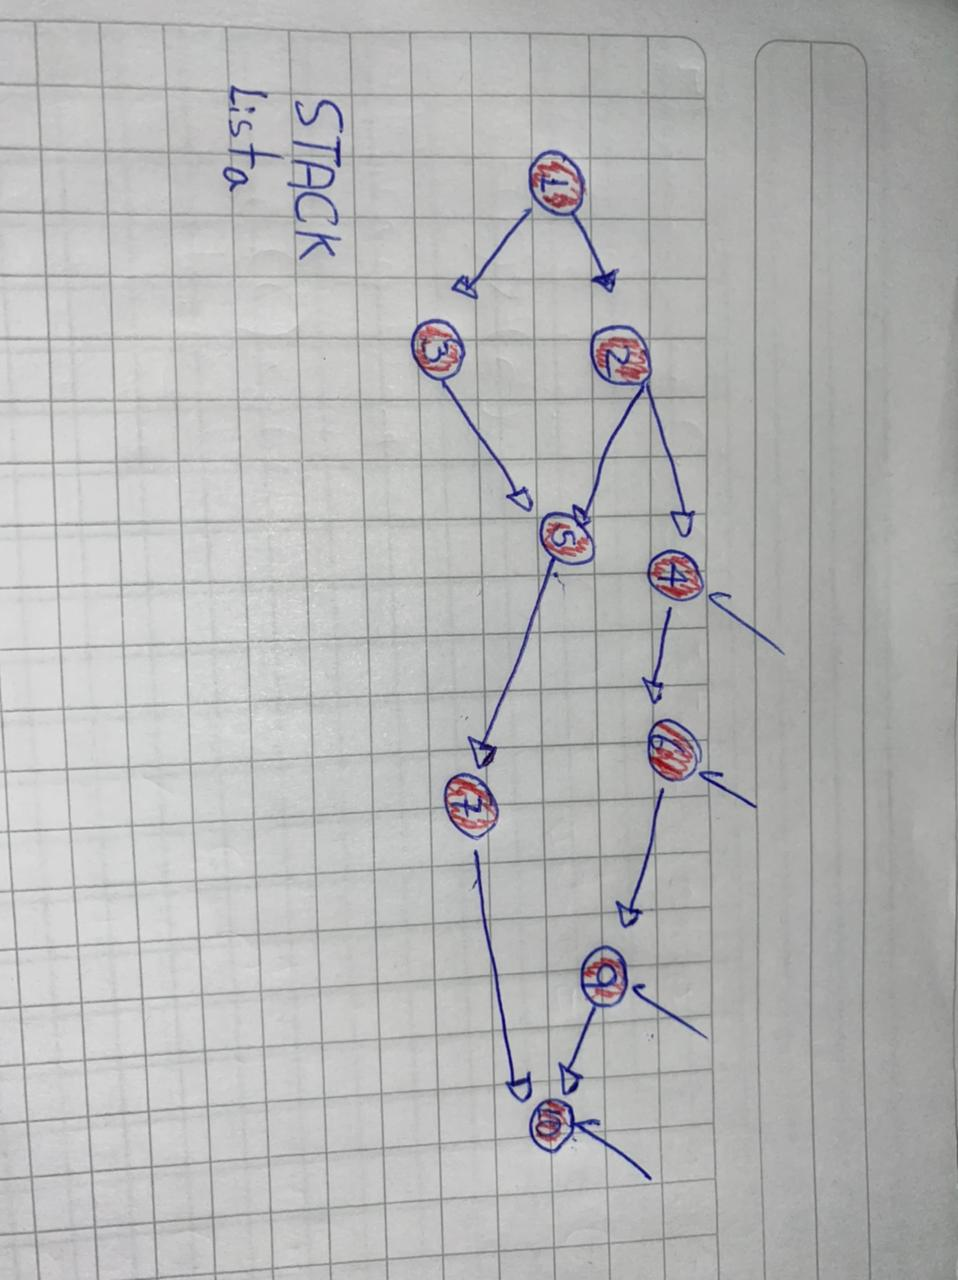

### **Stack = $[1,3,2,5,7]$**
### **Lista = $[4,6,9,10]$**

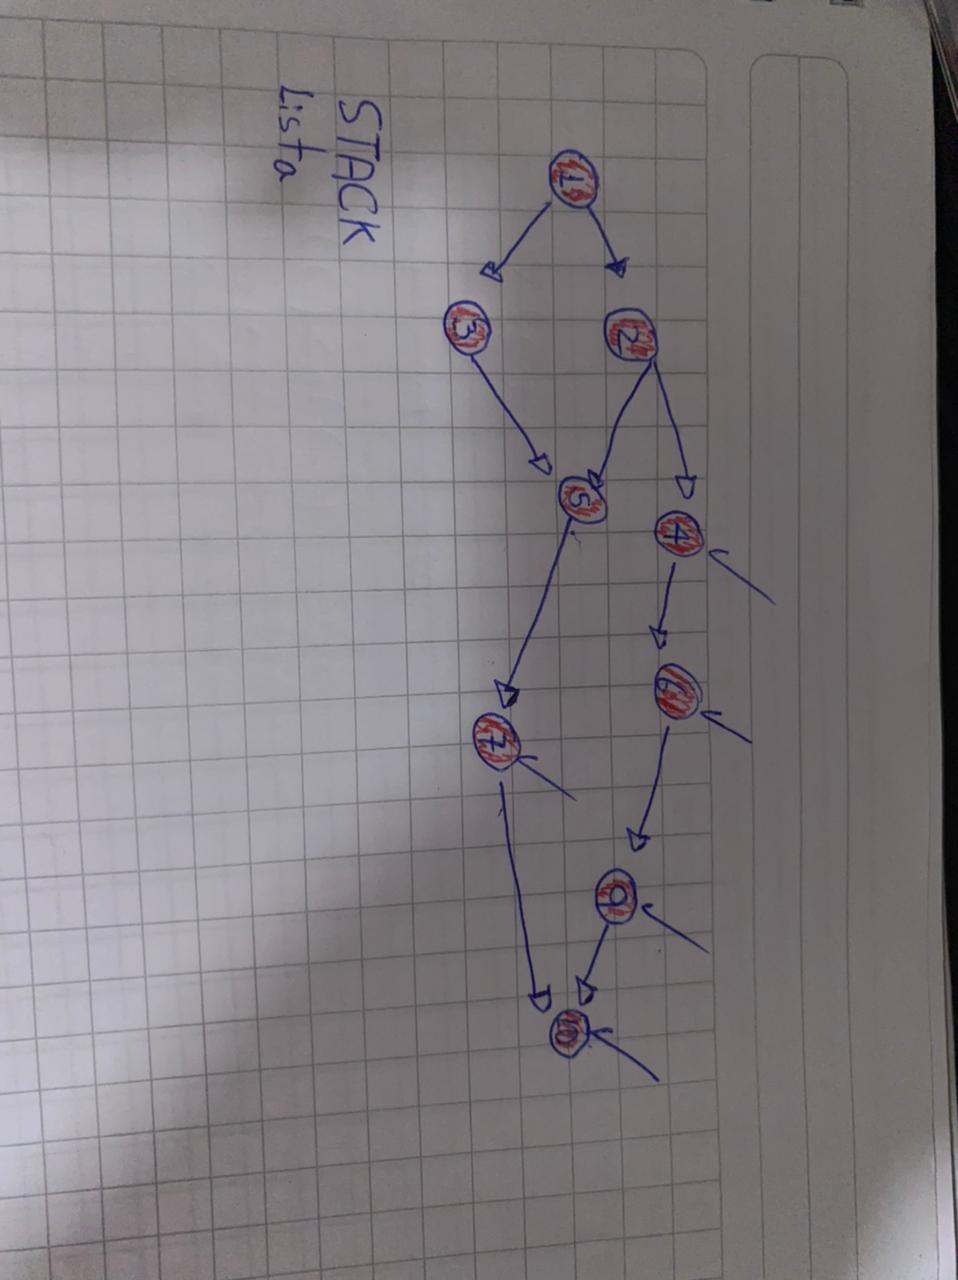

### **Se repite el proceso hasta vaciar la pila por lo tanto la lista queda de la forma:**
### **Stack = $[  ]$**
### **Lista = $[1,3,2,5,7,4,6,9,10]$**

### **2.2 Topological Sort Iterativo**

In [17]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph
V = 5
grafo = graph_instance_creator(V)
print(grafo)
t = len(grafo)
print(t)

defaultdict(<class 'list'>, {2: [3], 0: [4, 1], 3: [4, 1], 1: [4]})
4


In [18]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

graph_to_nxdigraph(grafo)

In [19]:
def topologicalSort(T):
  state = dict()
  for n in T: state[n] = "no descubierto"

  L = [] #Lista auxiliar
  for n in T:
    S=[n]
    while len(S)>0:
      n=S.pop()
      if state[n] == "no descubierto":
        state[n] = "descubierto"
        S.append(n)
        for adj in reversed(list(T[n])):
          if state[adj] == "no descubierto": S.append(adj)
      elif state[n] == "descubierto":
        state[n] = "visitado"
        L.append(n)
  L = list(reversed(L))
  return L

In [20]:
g = graph_instance_creator(10)
h =graph_to_nxdigraph(g)
lista = topologicalSort(h)
print (lista)


[2, 1, 4, 0, 5, 8, 9, 3, 6, 7]


### **2.3 Topological Sort Recursivo**

In [21]:

def int_to_alpha(n):
  return chr(ord('a') + n)
def DFS_recursivo(A, principio, cantidad, listaOrdenada, verbose=False):
  A.nodes[principio]['state'] = 1 # Nodo descubierto
  adj_list = list(reversed(list(G[principio])))#nodos adayacentes


  for adj in adj_list: 
    if A.nodes[adj]['state'] == 0: #Se llama a dfs recursivamente si no se ha descubierto el nodo para cada nodo adyacente no explorado
      listaOrdenada, listaOrdenada = DFS_recursivo(A, adj, listaOrdenada, listaOrdenada, verbose)

  A.nodes[principio]['order'] = listaOrdenada # Etiqueta del nodo 
  A.nodes[principio]['state'] = 2 # nodo visitado
  listaOrdenada.append(int_to_alpha(principio)) # Se inserta el nodo

  listaOrdenada -= 1 # Disminuimos el contador en 1

  # Se retorna la cantidad y la lista ordenada
  return cantidad, listaOrdenada  

In [22]:

def topological_sort_recursivo(A):
  cont = len(A.nodes())
  listaOrdenada = list()

  for c in A.nodes(): # Recorrido nodos
    if A.nodes[c]['state'] == 0: # Si el nodo no ha sido explorado
      # Se aplica DFS con cada nodo no explorado
      cont, listaOrdenada = DFS_recursivo(A, c, cont, listaOrdenada)
  listaOrdenada.reverse() # se invierte la lista
  return listaOrdenada # Retornada la lista de orden topológico




In [23]:
lista = topologicalSort(h)
print (lista)

[2, 1, 4, 0, 5, 8, 9, 3, 6, 7]


# **3. Tiempo de Ejecución**

### **3.1 Teorema**

El algoritmo topologicalSort tiene complejidad $O(n+b)$ con $b$ el número de **arcos** y $n$ la cantidad de **nodos**.

### **3.2 Prueba del Teorema**

El algoritmo almacena una única vez cada nodo en el stack lo cual tiene $O(n)$ de complejidad. 

Para cada nodo, se recorre una sola vez sus direcciones por lo que la complejidad dependerá de la cantidad de arcos que cada nodo posea siendo $O(b)$ su complejidad.

Por lo tanto se demuestra que el algoritmo tiene un tiempo de ejecución $O(n+b)$

# **4. Correctitud**

### **4.1 Correctitud DFS**

Para probar la correctitud del algoritmo observaremos el comportamiento de DFS.

DFS utiliza un stack o pila, el cual utiliza la lógica LIFO (Last In First Out).

1. En cada iteración se agrega un nodo padre con sus nodos hijos.

2. Considerando una conexión $(u,v)$, v corresponde a un nodo descubierto y no visitado de u o no descubierto. 
En caso que ya haya sido descubierto y visitado debe existir una conexión $(v,u)$ y sería cíclico.

3. Si al asignar un elemento del stack se le asigna un valor $f(x)$, que va desde la cantidad de nodos y se va restando 1 hasta llegar al último.

### **4.2 Teorema**

Para cualquier asignación $f(u)$ y $f(v)$ de una conexión $(u,v)$, se cumple $f(u) > f(v)$.

### **4.2.1 Prueba del Teorema**

Si $v$ es un nodo no descubierto, se marca como descubierto, luego como visitado y finalmente se retira de la pila y se le agrega el valor de referencia $f(v)$.

Si $v$ es descubierto y visitado, no entra al stack.

Cuando $u$ sale del stack, se le asignará un valor de refencia $f(u)$, el cual trivialmente será mayor a $f(v)$, debido a que saldrá inmediatamente después.

# **5. Experimentos**

### **5.1 Tiempo de Ejecución**

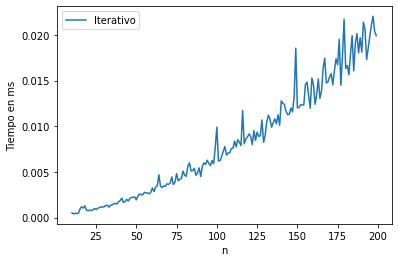

In [28]:

  
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]

for n in range(10,200):
  G = graph_instance_creator(n)
  G = graph_to_nxdigraph(G)
  H = G.copy()

  t1 = repeat(setup="from __main__ import topologicalSort", stmt=lambda: topologicalSort(G), repeat=1, number=10)
  #t2 = repeat(setup="from __main__ import topological_sort_recursivo", stmt=lambda: topological_sort_recursivo(H), repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  #y2.append(t2)

plt.plot(x,y1)
#plt.plot(x,y2)
plt.legend(["Iterativo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **5.1.1 Análisis de Resultados**

Como se explicó anteriormente, el algoritmo topologicalSort tiene complejidad $O(n+b)$ con $b$ el número de **arcos** y $n$ la cantidad de **nodos** y si se muestra la gráfica, se ve algo bastante acorde a la compllejidad ya que a medida que aumenta la cantidad de datos, el tiempo de ejecución asciende de forma proporcional.